IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

DATA PREPROCESSING

TRAINING DATA PREPROCESSING

In [2]:
import os
print(os.listdir("/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [4]:
import os
print(os.listdir("/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"))

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

VALIDATION IMAGE PROCESSING

In [5]:
Validation_set_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


Here we have encountered issue on training dataset that is the loss is increasing so-To avoid Overshooting Loss function
Choose small learning rate default 0.001 here we have taken 0.0001
There may be chance of underfitting so increase number of neuron
Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

BUILDING MODEL

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model=Sequential()

BUILDING CONVOLUTIONAL LAYER

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))


In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))


In [17]:
#output layer
model.add(Dense(units=38,activation='softmax'))

COMPILING MODEL

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

MODEL TRAINING

In [19]:
training_history = model.fit(x=training_set,validation_data=Validation_set_set,epochs=10)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 173s 73ms/step - accuracy: 0.3869 - loss: 2.1796 - val_accuracy: 0.8433 - val_loss: 0.5084
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.8300 - loss: 0.5383 - val_accuracy: 0.9025 - val_loss: 0.2976
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.8990 - loss: 0.3126 - val_accuracy: 0.9322 - val_loss: 0.2188
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9335 - loss: 0.2026 - val_accuracy: 0.9491 - val_loss: 0.1590
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9523 - loss: 0.1457 - val_accuracy: 0.9570 - val_loss: 0.1335
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9638 - loss: 0.1085 - val_accuracy: 0.9600 - val_loss: 0.1248
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 130s 59ms/step - accuracy: 0.9693 - loss: 0.0923 - val_accuracy: 0.9635 - val_loss: 0.1113
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 

MODEL EVALUATION

In [21]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.9900 - loss: 0.0299
Training accuracy: 0.9909666180610657


In [23]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(Validation_set_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9645 - loss: 0.1207
Validation accuracy: 0.9627248048782349


ACCURACY VISUALIZATION

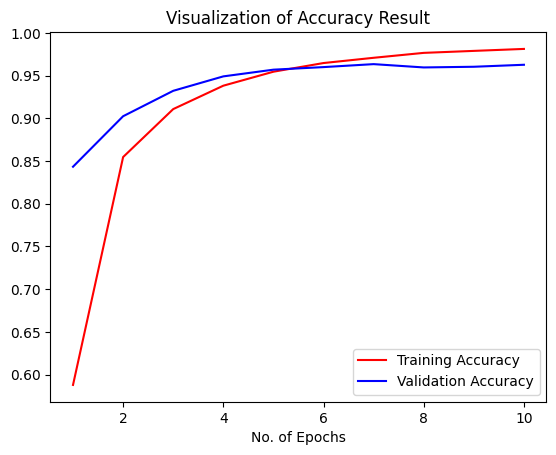

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

SAVING MODEL

In [28]:
model.save('trained_plant_disease_model.keras')


TESTING IMAGES

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [29]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

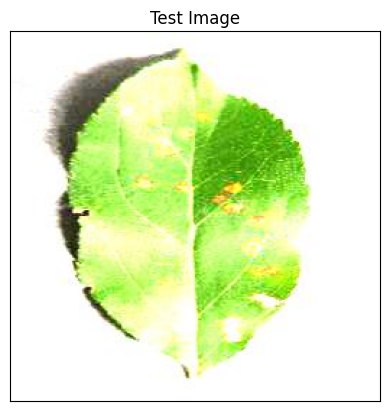

In [38]:
#Test Image Visualization
import cv2
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

TESTING MODEL

In [32]:
import numpy as np 
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [33]:
print(predictions)


[[9.1804601e-08 9.8556967e-08 9.9992776e-01 1.7264391e-11 1.1525718e-09
  8.2156779e-09 2.6822924e-11 3.3138212e-10 4.2247042e-14 2.8496246e-13
  1.9390495e-14 2.4303294e-05 4.1274142e-10 1.9118287e-11 1.5048379e-07
  4.7864712e-09 1.3884731e-07 3.0488299e-11 2.4296710e-07 2.5462441e-09
  9.0464539e-13 5.5146217e-12 3.7650681e-11 1.0244301e-10 2.6888335e-11
  7.7279641e-12 2.2527633e-10 1.6339120e-10 8.4267940e-06 1.8608308e-08
  2.6645706e-09 1.4338265e-10 3.8535574e-05 1.2913228e-11 2.1194596e-07
  5.8414851e-10 4.0280673e-10 5.9756595e-09]]


In [34]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


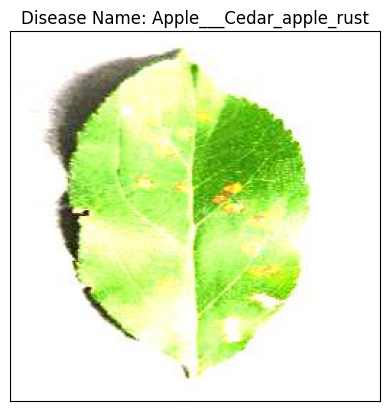

In [35]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

LETS MAKE ANOTHER PREDICTION

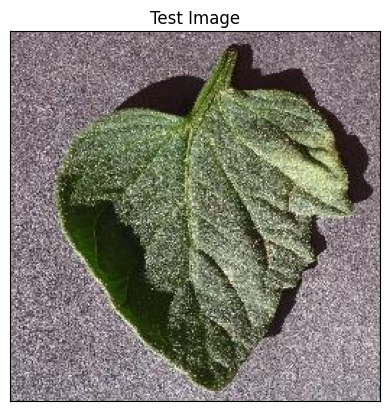

In [39]:
import cv2
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/TomatoHealthy1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [40]:
import numpy as np 
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
print(predictions)
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[2.0460650e-13 1.2482628e-13 7.4883242e-12 2.5218736e-09 1.4106749e-15
  1.0441323e-07 2.4393717e-15 1.5145814e-13 1.4375765e-15 2.0037091e-14
  3.9502903e-14 8.2700898e-16 7.5241808e-14 1.4035888e-16 2.5783360e-17
  3.2707343e-15 4.7651280e-12 2.6387372e-15 2.3509389e-14 4.3212189e-14
  1.1296734e-12 9.9154714e-14 1.5708160e-11 3.8599010e-14 1.5496094e-12
  2.0147847e-10 1.9194386e-11 2.5777793e-14 2.5097643e-11 4.6056423e-12
  1.1104098e-10 2.2501856e-10 2.6661425e-11 1.5632124e-11 2.0419241e-06
  2.7157056e-15 3.2158785e-14 9.9999785e-01]]
37


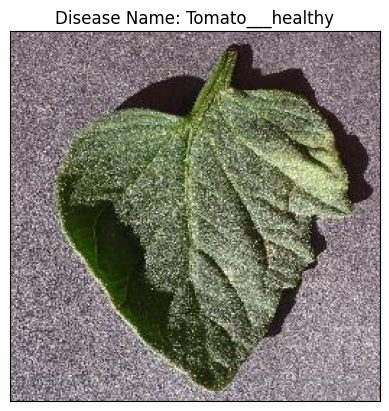

In [41]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()